# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
from numpy.random import default_rng

# Functions

In [2]:
def generate_spending_data(conversion_rate, mean_of_logs_of_spend, variance_of_logs_of_spend, number_of_samples):
    
    data_revenue = np.random.lognormal(
        mean_of_logs_of_spend,
        np.sqrt(variance_of_logs_of_spend),
        number_of_samples,
    )
    data_all = np.random.binomial(1, conversion_rate, number_of_samples).astype(float)
    data_all[data_all > 0] = data_revenue[data_all > 0]

    return data_all

# Constants

In [3]:
true_data_conversion_rate = 0.01
true_mean_of_logs_of_spend = 2
true_variance_of_logs_of_spend = 2

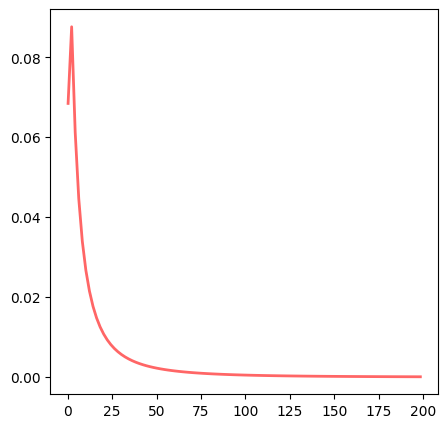

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
x = np.linspace(
        scipy.stats.lognorm.ppf(0.01, np.sqrt(true_variance_of_logs_of_spend), 0, np.exp(true_mean_of_logs_of_spend)),
        scipy.stats.lognorm.ppf(0.99, np.sqrt(true_variance_of_logs_of_spend), 0, np.exp(true_mean_of_logs_of_spend)),
        100,
    )
    
ax.plot(x, scipy.stats.lognorm.pdf(x, np.sqrt(true_variance_of_logs_of_spend), 0, np.exp(true_mean_of_logs_of_spend)),
        "r-", lw=2, alpha=0.6,label="norm pdf",
    )

# Simulations

In [77]:
def simulate_posterior_means(inverse_gamma_prior, m_prior, w_prior, num_of_spending_samples):
    posterior_means = []

    for i in range(1000):
        spends = generate_spending_data(true_data_conversion_rate, true_mean_of_logs_of_spend, true_variance_of_logs_of_spend, num_of_spending_samples)
        true_mean_of_lognorm = np.exp(true_mean_of_logs_of_spend + true_variance_of_logs_of_spend/2)

        # compute aggregate data values
        total = len(spends)
        positives = len(spends[spends > 0])
        sum_logs = np.sum(np.log(spends[spends > 0]))
        sum_logs_2 = np.sum(np.log(spends[spends > 0]) ** 2)
        x_bar = sum_logs / positives

        # compute posterior
        a_prior_ig, b_prior_ig = inverse_gamma_prior
        a_post_ig = a_prior_ig + (positives / 2)
        b_post_ig = (
            b_prior_ig
            + (1 / 2) * (sum_logs_2 - 2 * sum_logs * x_bar + positives * (x_bar**2))
            + ((positives * w_prior) / (2 * (positives + w_prior)))
            * ((x_bar - m_prior) ** 2)
        )

        m_post = (positives * x_bar + w_prior * m_prior) / (positives + w_prior)
        w_post = w_prior + positives

        # Sample means of lognormal
        rng = default_rng(seed=293809384)
        sampled_variances = 1 / rng.gamma(a_post_ig, 1 / b_post_ig, 10000)
        sampled_means = []
        # for each variance generate a mean
        for sampled_variance in sampled_variances:
            sampled_means.append(rng.normal(m_post, np.sqrt(sampled_variance / w_post)))

        # compute the means of the lognormal distribution
        sampled_means_of_lognormal = np.exp(sampled_means + sampled_variances / 2)

        
        posterior_mean_of_lognormal = np.mean(sampled_means_of_lognormal)
        posterior_means.append(posterior_mean_of_lognormal)

    print(len(posterior_means))

    posterior_means = np.array(posterior_means)
    #fig, ax = plt.subplots(figsize=(9, 6))
    #sns.histplot(posterior_means- true_mean_of_lognorm)
    print(f"Number of data points: {num_of_spending_samples}")
    print(f"Value of m_prior: {m_prior}")
    print(f"Values of inverse_gamma_prior: {inverse_gamma_prior}")
    print(f"Value of w_prior: {w_prior}")
    print(f"Mean of the absolute errors of the simulated posterior means: {np.mean(np.abs(posterior_means- true_mean_of_lognorm))}")
    print(f"Variance of the absolute errors of the simulated posterior means: {np.var(np.abs(posterior_means- true_mean_of_lognorm))}")
    return np.mean(np.abs(posterior_means- true_mean_of_lognorm))

In [78]:
inverse_gamma_prior_values = [(2.5, 3), (11, 20), (3, 6), (21, 60)]
m_prior_values = [1.5, 2, 4]
w_prior_values = [0.01, 1, 100, 10000]
num_sample_points_list = [1000, 10000, 100000, 1000000]

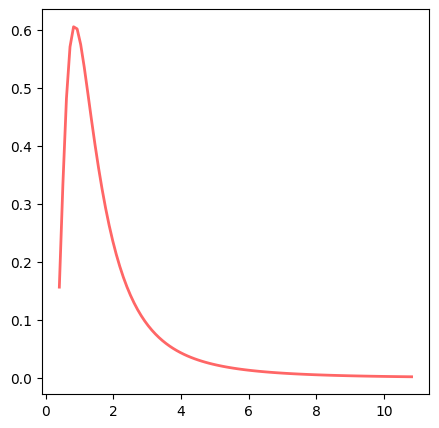

In [17]:
a_prior_ig = 2.5
b_prior_ig = 3

fig, ax = plt.subplots(figsize=(5, 5))
x = np.linspace(
scipy.stats.invgamma.ppf(0.01, a_prior_ig, 0, b_prior_ig),
scipy.stats.invgamma.ppf(0.99, a_prior_ig, 0, b_prior_ig),
        100,
    )
ax.plot(
        x,
        scipy.stats.invgamma.pdf(x, a_prior_ig, 0, b_prior_ig),
        "r-",
        lw=2,
        alpha=0.6,
        label="norm pdf",
    )

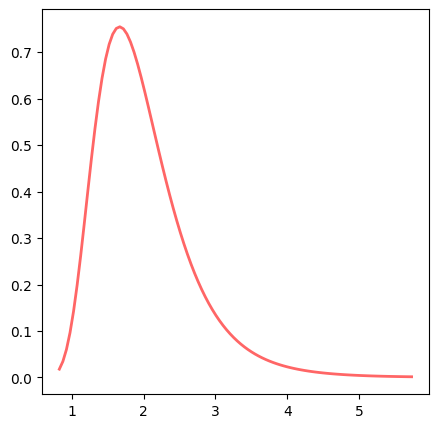

In [10]:
a_prior_ig = 11
b_prior_ig = 20

fig, ax = plt.subplots(figsize=(5, 5))
x = np.linspace(
scipy.stats.invgamma.ppf(0.001, a_prior_ig, 0, b_prior_ig),
scipy.stats.invgamma.ppf(0.999, a_prior_ig, 0, b_prior_ig),
        100,
    )
ax.plot(
        x,
        scipy.stats.invgamma.pdf(x, a_prior_ig, 0, b_prior_ig),
        "r-",
        lw=2,
        alpha=0.6,
        label="norm pdf",
    )

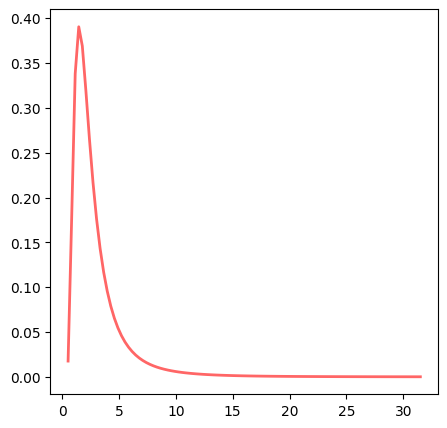

In [16]:
a_prior_ig = 3
b_prior_ig = 6

fig, ax = plt.subplots(figsize=(5, 5))
x = np.linspace(
scipy.stats.invgamma.ppf(0.001, a_prior_ig, 0, b_prior_ig),
scipy.stats.invgamma.ppf(0.999, a_prior_ig, 0, b_prior_ig),
        100,
    )
ax.plot(
        x,
        scipy.stats.invgamma.pdf(x, a_prior_ig, 0, b_prior_ig),
        "r-",
        lw=2,
        alpha=0.6,
        label="norm pdf",
    )

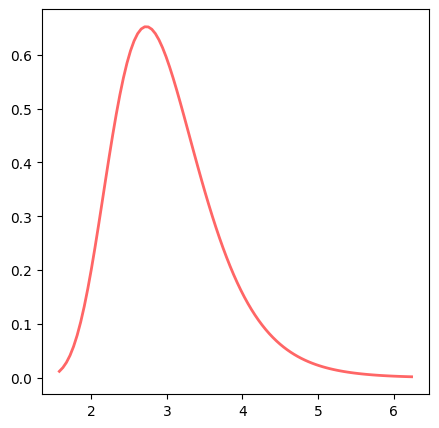

In [11]:
a_prior_ig = 21
b_prior_ig = 60

fig, ax = plt.subplots(figsize=(5, 5))
x = np.linspace(
scipy.stats.invgamma.ppf(0.001, a_prior_ig, 0, b_prior_ig),
scipy.stats.invgamma.ppf(0.999, a_prior_ig, 0, b_prior_ig),
        100,
    )
ax.plot(
        x,
        scipy.stats.invgamma.pdf(x, a_prior_ig, 0, b_prior_ig),
        "r-",
        lw=2,
        alpha=0.6,
        label="norm pdf",
    )

In [79]:
iterables = [m_prior_values, inverse_gamma_prior_values, w_prior_values]
index = pd.MultiIndex.from_product(iterables, names=["m_prior", "inverse_gamma_prior", "w_prior"])
results_df = pd.DataFrame({}, index = index, columns = [1000, 10000, 100000, 1000000])

In [80]:
for i, m_prior_value in enumerate(m_prior_values):    
    for j, inverse_gamma_prior_value in enumerate(inverse_gamma_prior_values):
        for k, w_prior_value in enumerate(w_prior_values):
            for l, num_points in enumerate(num_sample_points_list):
                results_df.loc[(m_prior_value, inverse_gamma_prior_value, w_prior_value), num_points] = simulate_posterior_means(inverse_gamma_prior_value, m_prior_value, w_prior_value, num_points)

1000
Number of data points: 1000
Value of m_prior: 1.5
Values of inverse_gamma_prior: (2.5, 3)
Value of w_prior: 0.01
Mean of the absolute errors of the simulated posterior means: 10427124521.00434
Variance of the absolute errors of the simulated posterior means: 1.0858790843845602e+23


c:\Users\karol\anaconda3\envs\assetario_ab_testing_3_8_new\lib\site-packages\pandas\core\algorithms.py:1665: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return arr.searchsorted(value, side=side, sorter=sorter)  # type: ignore[arg-type]


1000
Number of data points: 10000
Value of m_prior: 1.5
Values of inverse_gamma_prior: (2.5, 3)
Value of w_prior: 0.01
Mean of the absolute errors of the simulated posterior means: 3.386740692205516
Variance of the absolute errors of the simulated posterior means: 8.398817137560417
1000
Number of data points: 100000
Value of m_prior: 1.5
Values of inverse_gamma_prior: (2.5, 3)
Value of w_prior: 0.01
Mean of the absolute errors of the simulated posterior means: 1.0308164646086544
Variance of the absolute errors of the simulated posterior means: 0.6233238437683833
1000
Number of data points: 1000000
Value of m_prior: 1.5
Values of inverse_gamma_prior: (2.5, 3)
Value of w_prior: 0.01
Mean of the absolute errors of the simulated posterior means: 0.32047933092012343
Variance of the absolute errors of the simulated posterior means: 0.05690233430020095
1000
Number of data points: 1000
Value of m_prior: 1.5
Values of inverse_gamma_prior: (2.5, 3)
Value of w_prior: 1
Mean of the absolute errors

C:\Users\karol\AppData\Local\Temp\ipykernel_52864\3379087042.py:13: RuntimeWarning: invalid value encountered in double_scalars
  x_bar = sum_logs / positives


1000
Number of data points: 1000
Value of m_prior: 2
Values of inverse_gamma_prior: (21, 60)
Value of w_prior: 0.01
Mean of the absolute errors of the simulated posterior means: nan
Variance of the absolute errors of the simulated posterior means: nan
1000
Number of data points: 10000
Value of m_prior: 2
Values of inverse_gamma_prior: (21, 60)
Value of w_prior: 0.01
Mean of the absolute errors of the simulated posterior means: 4.416889189922105
Variance of the absolute errors of the simulated posterior means: 12.731096570356284
1000
Number of data points: 100000
Value of m_prior: 2
Values of inverse_gamma_prior: (21, 60)
Value of w_prior: 0.01
Mean of the absolute errors of the simulated posterior means: 1.0909237601807853
Variance of the absolute errors of the simulated posterior means: 0.6926793829964665
1000
Number of data points: 1000000
Value of m_prior: 2
Values of inverse_gamma_prior: (21, 60)
Value of w_prior: 0.01
Mean of the absolute errors of the simulated posterior means: 0

In [81]:
results_df

1000     \
m_prior inverse_gamma_prior w_prior                                      
1.5     (2.5, 3)            0.01                    10427124521.004339   
                            1.00                      244714764.996084   
                            100.00                     12244468.408236   
                            10000.00                      219740.11251   
        (11, 20)            0.01                             10.440689   
                            1.00                              8.741802   
                            100.00                            6.215914   
                            10000.00                          6.795134   
        (3, 6)              0.01                      231864709.754883   
                            1.00                          69685.131507   
                            100.00                      4574607.508024   
                            10000.00          1811821366565038718976.0   
        (21, 60)            0.01                              24.17292   
                            1.00                             18.702196   
                            100.00                             2.17925   
                            10000.00                           1.71777   
2.0     (2.5, 3)            0.01                      383458872.325086   
                            1.00                       99561129.221447   
                            100.00                     25133577.494635   
                            10000.00                  152939118.946027   
        (11, 20)            0.01                             10.050168   
                            1.00                              9.222559   
                            100.00                            2.857119   
                            10000.00                           2.72404   
        (3, 6)              0.01                         1134434.14322   
                            1.00                    4449990523695632.5   
                            100.00                    465367655.977062   
                            10000.00                      17502.445633   
        (21, 60)            0.01                                   NaN   
                            1.00                             20.522196   
                            100.00                           12.200361   
                            10000.00                         11.644825   
4.0     (2.5, 3)            0.01                      159114823.022099   
                            1.00                 7918365415506611200.0   
                            100.00           41128524908205027885056.0   
                            10000.00  117777100114526931742657347584.0   
        (11, 20)            0.01                             10.734877   
                            1.00                             14.106559   
                            100.00                          248.670499   
                            10000.00                        344.055131   
        (3, 6)              0.01                         352854.013387   
                            1.00                    18744635533.293301   
                            100.00                  3283725111562069.0   
                            10000.00               2168402697341963.25   
        (21, 60)            0.01                             22.789353   
                            1.00                             30.099061   
                            100.00                           275.16136   
                            10000.00                        344.186649   

                                          10000       100000      1000000  
m_prior inverse_gamma_prior w_prior                                        
1.5     (2.5, 3)            0.01         3.386741    1.030816    0.320479  
                            1.00         3.253768    1.008442    0.316473  
                            100.00        3.75391    1.077

In [83]:
results_df.to_csv('results_df')